In [ ]:
from IPython.utils.sysinfo import get_sys_info
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.001
alif=200
funk=0
grad=0
ges=0
it=0
# --- перемена местами двух строк системы
def SwapRows(A, B, row1, row2):
    A[row1], A[row2] = A[row2], A[row1]
    B[row1], B[row2] = B[row2], B[row1]
# --- end of перемена местами двух строк системы
# --- деление строки системы на число
def DivideRow(A, B, row, divider):
    A[row] = [a / divider for a in A[row]]
    B[row] /= divider
# --- end of деление строки системы на число
# --- сложение строки системы с другой строкой, умноженной на число
def CombineRows(A, B, row, source_row, weight):
    A[row] = [(a + k * weight) for a, k in zip(A[row], A[source_row])]
    B[row] += B[source_row] * weight
# --- end of сложение строки системы с другой строкой, умноженной начисло
# --- решение системы методом Гаусса (приведением к треугольному виду)
def Gauss(A, B):
    column = 0
    while (column < len(B)):
        current_row = None
        for r in range(column, len(A)):
            if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
                 current_row = r
        #if current_row is None:
            #return None
        if current_row != column:
            SwapRows(A, B, current_row, column)
        DivideRow(A, B, column, A[column][column])
        for r in range(column + 1, len(A)):
            CombineRows(A, B, r, column, -A[r][column])
        column += 1
    X = [0 for b in B]
    for i in range(len(B) - 1, -1, -1):
        X[i] = B[i] - sum(x * a for x, a in zip(X[(i + 1):], A[i][(i + 1):]))
    return X


def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2

def squ(x):
  global funk
  funk+=1
  return 5*x[0]*x[0] + 4*x[0]*x[1]+2*x[1]*x[1]+4*math.sqrt(5)*(x[0]+x[1])-14

def antigrad(x,roz):
    global grad
    grad+=1
    if(roz([1,1])<0.000001):
      return np.array([-alif*4*x[0]*(x[0]**2-x[1])-2*(x[0]-1), alif*2*(x[0]**2-x[1])])
    else:
      return np.array([-10*x[0]-4*x[1]-4*math.sqrt(5), -4*x[0] -4*x[1]-4*math.sqrt(5)])

def norm(x):
    nor=0
    for i in range(2):
        nor +=x[i]*x[i]
    return math.sqrt(nor)

def H(x,roz):
  global ges
  ges+=1
  if(roz([1,1])<0.000001):
    return np.array([[4*alif*(x[0]**2-x[1])+4*alif*x[0]*2*x[0]+2,-4*alif*x[0]],[-2*alif*2*x[0], 2*alif]])
  return np.array([[10,4],[4,4]])

def polop(a):
  if(a[0][0]>0 and (a[0][0]*a[1][1] - a[1][0]*a[0][1])>0):
    return True
  return False

def f(x):
  return math.sqrt((h[0][0]*x[0]+h[0][1]*x[1]-ant[0])**2+ (h[1][0]*x[0]+h[1][1]*x[1]-ant[1])**2)#igrad(x0,roz)

def antif(x):
  #return np.array([h[0][0]+h[1][0], h[0][1]+h[1][1]])
  g1= -1/(2*((h[0][0]*x[0]+h[0][1]*x[1]-ant[0])**2+ (h[1][0]*x[0]+h[1][1]*x[1]-ant[1])**2))*((2*(h[0][0]*x[0]+h[0][1]*x[1]-ant[0])*h[0][0])+2*(h[1][0]*x[0]+h[1][1]*x[1]-ant[1])*h[0][1])
  g2=-1/(2*((h[0][0]*x[0]+h[0][1]*x[1]-ant[0])**2+ (h[1][0]*x[0]+h[1][1]*x[1]-ant[1])**2))*((2*(h[0][0]*x[0]+h[0][1]*x[1]-ant[0])*h[0][1])+2*(h[1][0]*x[0]+h[1][1]*x[1]-ant[1])*h[1][1])
  return np.array([g1,g2])
def inv(h):
  op=1/(h[0][0]*h[1][1]-h[0][1]*h[1][0])
  inver=np.array([[h[1][1], -h[0][1]],[-h[1][0], h[0][0]]])
  inver=op*inver
  return inver
def inr(h,x):
  op=1/(8*alif**2*x[0]**2-8*alif**2*x[1]+4*alif)
  inver=np.array([[2*alif, 4*alif*x[0]],[4*alif*x[0], 4*alif*(x[0]**2-x[1])+8*alif*x[0]**2+2]])
  return op*inver
def gold(epsg,point,roz,antigr):
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=roz(point + x1 * antigr)
    f2=roz(point + x2 * antigr)
    while(math.fabs(b-a)>=epsg):
        if(f1<f2):
            b=x2
            x2=x1
            x1=a+b-x2
            f2=f1
            f1=roz(point + x1 * antigr)
        else:
            a=x1
            x1=x2
            x2=a+b-x1
            f1=f2
            f2=roz(point + x2 * antigr)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2


def flatch(f,x0):
  global unsv1,unsv1s,it
  p=antif(x0)
  k=1
  while(norm(antif(x0))>eps):

    kappa=gold(0.0001,x0,f,p)
    x=x0+kappa*p
    ant=antif(x)
    if(norm(ant)<eps):
      print(x)
      return 0
    if(k%10000==0):
      p=ant
    else:
      if((norm(antif(x0))**2)<0.00001):
        return 0
      p = (((norm(ant))**2) / (norm(antif(x0)))**2) * p + ant;
    x0=x
    k+=1
    if(k>1000):
      return x0
  return x0


def newton(roz,x0):
  global h,ant,unsv1,unsv1s,it
  k=0
  if(abs(roz([1,1]))<0.00001):
      unsv1.append(x0)
  else:
      unsv1s.append(x0)
  ant=antigrad(x0,roz)
  while(norm(ant)>eps):
    k+=1

    it+=1
    h=H(x0,roz)
    lamb=1
    while(polop(h)==False):
      h=h+np.array([[lamb,0],[0,lamb]])

    if(abs(roz([1,1]))<0.0001):
      p=inr(h,x0).dot(ant)
    else:
      p=inv(h).dot(ant)
    #p=flatch(f,x0)#(h,antigrad(x0,roz),x)
    #p= np.array(Gauss(h,ant))
    cappa=gold(0.0001,x0,roz,p)
    x=x0+cappa*p
    x0=x
    if(abs(roz([1,1]))<0.000001):
      unsv1.append(x)
      ng.append(norm(ant))
    else:
      unsv1s.append(x)

    #print("x0= ",x0)
    ant=antigrad(x0,roz)
    if(k>100):
      print("x0= ",x0)
      return x0
  print("x0= ",x0)

def newton_dr(roz,x0):
  global h,ant,unsv2,unsv2s,it,alif
  k=0
  if(abs(roz([1,1]))<0.00001):
      unsv2.append(x0)
  else:
      unsv2s.append(x0)
  ant=antigrad(x0,roz)
  while(norm(ant)>eps):
    k+=1
    it+=1
    h=H(x0,roz)
    lamb=1
    while(polop(h)==False):
      h=h+np.array([[lamb,0],[0,lamb]])
    if(abs(roz([1,1]))<0.0001):
      p=inr(h,x0).dot(ant)
    else:
      p=inv(h).dot(ant)

    kappa=3
    omega=1
    nu=0.5
    j=0
    x = x0+p
    f1=roz(x0)
    f2=roz(x)
    while((abs(f1-f2) < omega*kappa*(norm(p))**2)and(kappa*norm(p)>0.000001)):
      #kappa=1/((itd+1)**(6/10))
      kappa = nu * kappa
      x = x0 + kappa*p
      f2=roz(x)
      j+=1
      if(j>5):
        break
    x0=x
    if(abs(roz([1,1]))<0.00001):
      unsv2.append(x)
    else:
      unsv2s.append(x)
    f1=f2
    #print("x0= ",x0)
    ant=antigrad(x0,roz)
    if(k>50):
      print(x0)
      return x0
  print("x0= ",x0)



x0=np.array([-1,-2])
unsv1=[]
unsv1s=[]
unsv2=[]
unsv2s=[]
ng=[]

newton(roz,x0)
print(it)
print(funk)
print(grad)
print(ges)
it=0
funk=0
grad=0
ges=0
newton_dr(roz,x0)
print(it)
print(funk)
print(grad)
print(ges)

it=0

newton(squ,x0)
print(it)
it=0
newton_dr(squ,x0)
print(it)

x0=  [1.00000006 1.00000012]
14
422
15
14
x0=  [0.99950042 0.99900104]
34
392
35
34
x0=  [ 5.37445302e-07 -2.23606810e+00]
1
x0=  [ 0.         -2.23606798]
1


<a list of 45 text.Text objects>

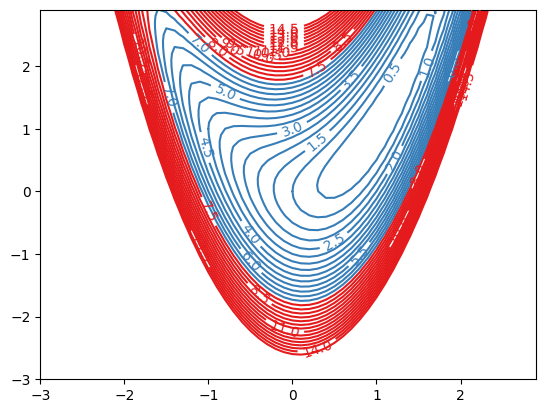

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)


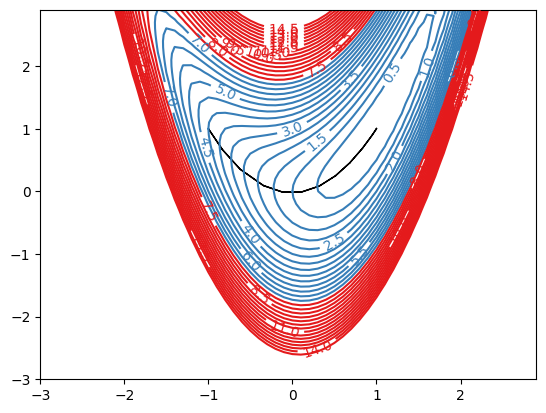

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

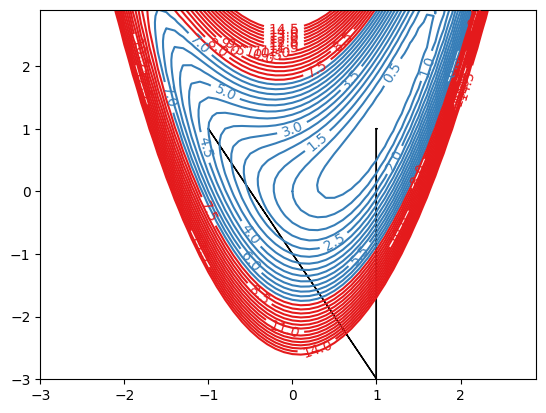

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])

for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

<a list of 13 text.Text objects>

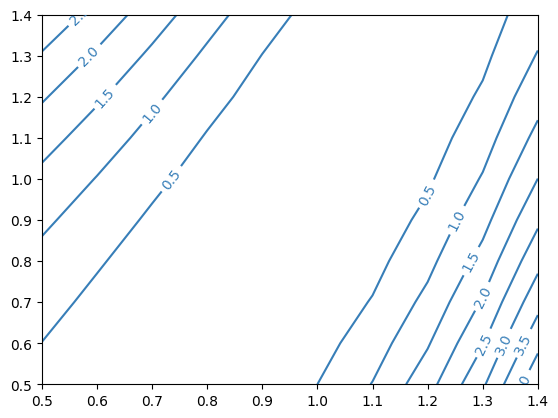

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(0.5, 1.5,0.1)
y = np.arange(0.5, 1.5,0.1)

Z = np.ones((10,10))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

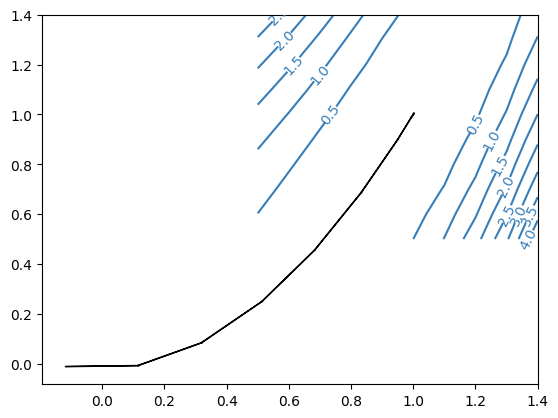

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(5,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

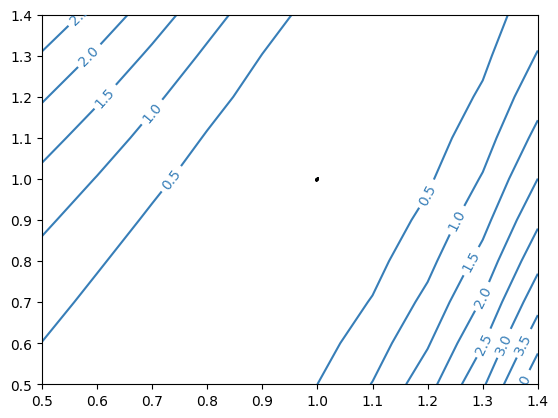

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(3,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

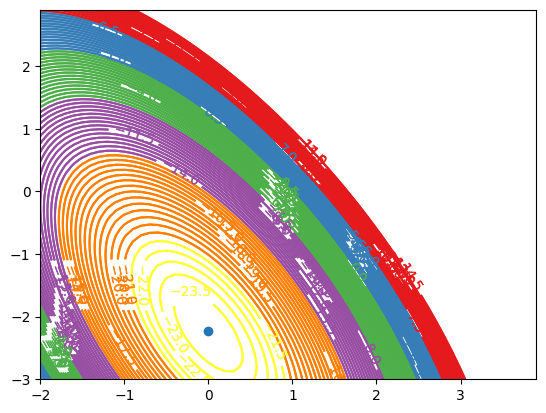

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 5*z[0]*z[0] + 4*z[0]*z[1]+2*z[1]*z[1]+4*math.sqrt(5)*(z[0]+z[1])-14

X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-2.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1s:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
plt.scatter(t_x,t_y)

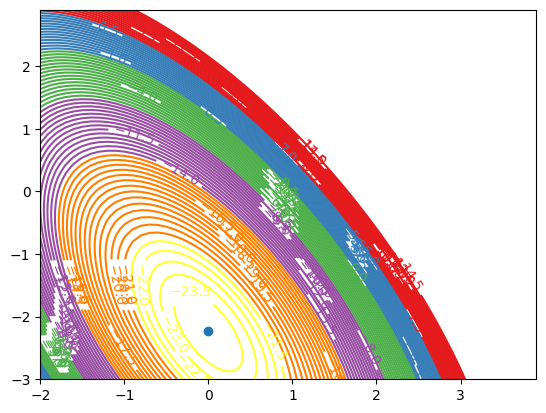

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2s:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
plt.scatter(t_x,t_y)

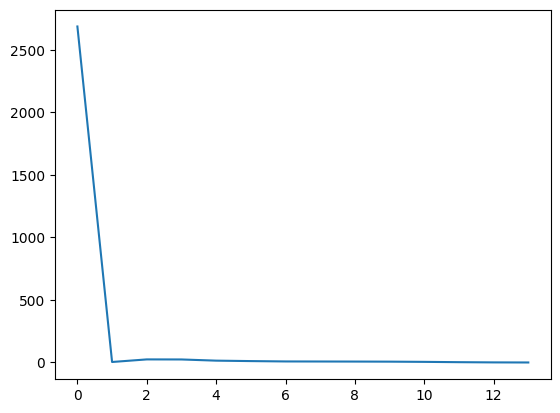

In [ ]:
k=np.arange(0,len(ng),1)
plt.plot(k,ng)
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()

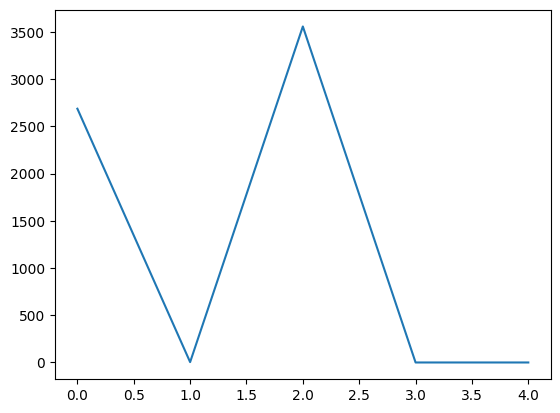

In [ ]:
k=np.arange(0,len(ng),1)
plt.plot(k,ng)
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()

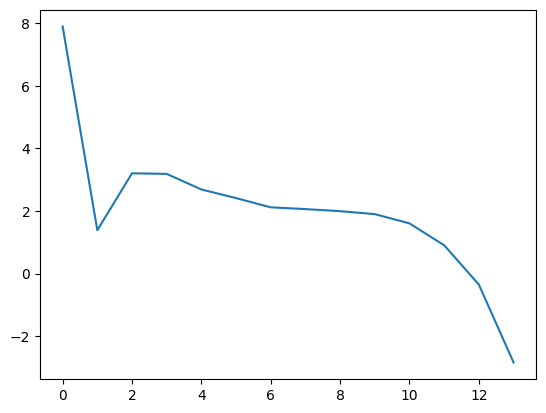

In [ ]:
k=np.arange(0,len(ng),1)
plt.plot(k,np.log(ng))
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()